# 4. 聚类实验

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

import pandas as pd
from os import path
import matplotlib.pyplot as plt
import collections

import warnings

warnings.filterwarnings('ignore')

在这次聚类实验中，我们还是使用上次的鸢尾花数据集。

## 4.1. 读取数据集

鸢尾花的数据是这样的，前四列是花的4个属性，最后一列花的种类（标签）。
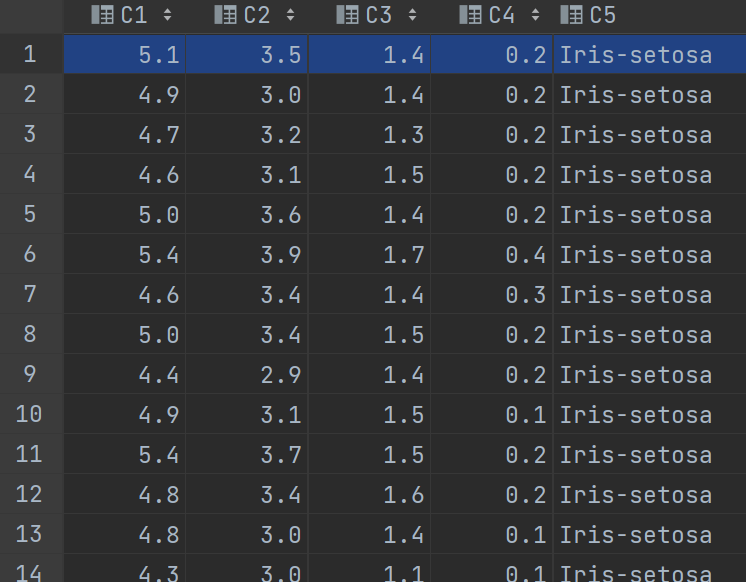

和上次的分类实验不同的一点是，聚类的过程中不需要标签信息。这里的标签只是为了方便后面的可视化展示。

In [54]:
def get_dataset(root_path, data_path):
    data_path = path.join(root_path, data_path)
    df_raw = pd.read_csv(data_path)
    data = df_raw.values
    print(f'鸢尾花数据集的形状是：{data.shape}')
    X = data[:, :-1]  # 前4列的数据
    print(f'四个属性的形状：{X.shape}')
    y = data[:, -1:]  # 最后一列是标签
    y_counter = collections.Counter(y.flatten())
    y_dict = {}
    for i, key in enumerate(y_counter.keys()):
        y_dict[key] = i
    print(y_dict)
    # y_dict = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
    # y_dict = {0.0: 0, 1.0: 1}
    for i in range(y.shape[0]):
        y[i] = y_dict[y[i].item()]  # 把字符串标签转换成数字标签，方便后续代码的处理
    print(f'标签的形状：{y.shape}')
    X = StandardScaler().fit_transform(X)  # 归一化
    X, y = shuffle(X, y)
    return X, y

## 4.2. 不同的聚类方法

接下来介绍sklearn库中K-means和DBscan方法怎么使用。

### 4.2.1. K-means方法

In [40]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score  # 轮廓系数

In [55]:
def k_means_cluster():
    X, y = get_dataset(root_path='../dataset/iris', data_path='iris.csv')
    k_means = KMeans(n_clusters=3)
    k_means.fit(X)
    y_pred = k_means.labels_
    print(f'K-means对 {X.shape[0]} 个数据的聚类结果如下：{y_pred}')
    return X, y, y_pred

In [67]:
X, y, y_pred = k_means_cluster()
score = silhouette_score(X, y_pred)
score

鸢尾花数据集的形状是：(149, 5)
四个属性的形状：(149, 4)
{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
标签的形状：(149, 1)
K-means对 149 个数据的聚类结果如下：[1 1 2 1 2 0 0 2 0 2 2 0 0 0 1 1 1 2 1 1 0 0 1 1 0 1 0 1 2 2 1 0 0 2 1 0 0
 2 1 2 0 0 2 2 0 0 1 0 1 1 2 2 2 1 2 2 1 1 1 0 2 0 0 1 1 2 0 2 2 1 2 0 1 2
 2 2 2 1 2 0 0 1 0 1 1 0 2 2 1 1 2 2 1 2 2 0 0 1 2 1 0 2 2 1 1 1 0 1 0 1 2
 2 2 0 2 2 1 0 1 0 0 2 0 1 0 2 1 0 1 0 2 1 0 1 0 1 0 1 0 2 0 0 1 1 1 0 0 2
 1]


0.45655541185952575

### 4.2.2. 降维和可视化

现在我们要对聚类的结果进行可视化，但是一条数据有四个属性，怎么才能把有四个属性的数据显示在二维坐标下呢？

这时我们就要用到降维的算法，`t-SNE`和`PCA`。通过降维算法，可以把任意维度的数据降到2维，然后就可以在二维坐标平面上显示了。

上面 K-means 聚类函数返回了`X, y, y_pred`，分别表示4维的鸢尾花属性数据，1维的真实标签，1维的聚类结果。下面，我们实现可视化函数。

In [24]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [57]:
def visualize(X, y, y_pred, title=None, type='pca'):
    # 可视化,pca降维或者tsne
    if type == 'pca':
        pca = PCA(n_components=2)  # n_components表示降到几维
        X_dim_reduction = pca.fit_transform(X)

    elif type == 'tsne':
        t_sne = TSNE(n_components=2)
        X_dim_reduction = t_sne.fit_transform(X)
    print(X_dim_reduction.shape)
    plt.figure(figsize=(10, 12))

    def get_color(y):
        color_dict = {-1: 'orange', 0: 'red', 1: 'green', 2: 'blue'}  # 定义聚类好后，每个簇的颜色
        color = []
        for i in range(y.shape[0]):
            color.append(color_dict[y[i].item()])
        return color
    plt.suptitle(title, fontweight=16)
    plt.subplot(211)
    plt.title('origin data')
    plt.scatter(X_dim_reduction[:, 0], X_dim_reduction[:, 1], c=get_color(y), edgecolors='black')
    plt.subplot(212)
    plt.title('cluster result')
    plt.scatter(X_dim_reduction[:, 0], X_dim_reduction[:, 1], c=get_color(y_pred), edgecolors='black')
    plt.show()

(149, 2)


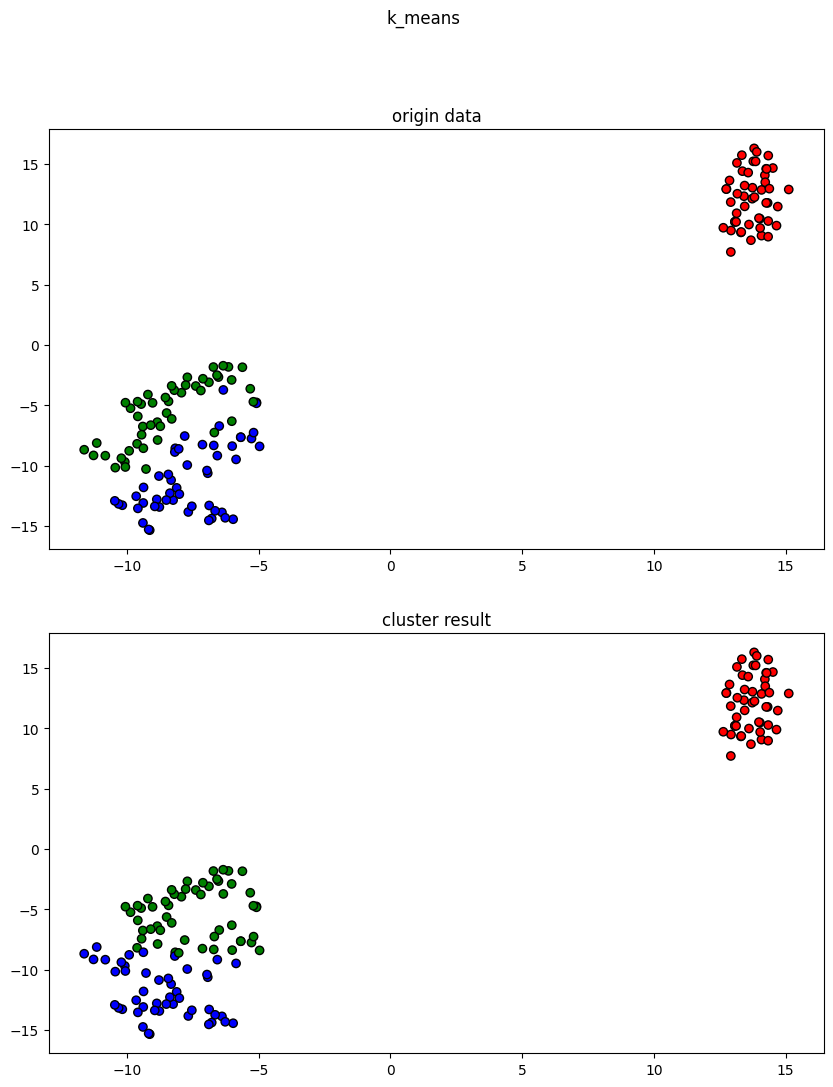

In [58]:
visualize(X, y, y_pred, title='k_means', type='tsne')

### 4.2.3. DBScan方法

和K-means一样：读取数据、模型拟合和聚类、可视化。

In [63]:
from sklearn.cluster import DBSCAN

In [68]:
def dbscan_cluster():
    X, y = get_dataset(root_path='../dataset/iris', data_path='iris.csv')
    # X, y = get_dataset(root_path='../dataset/appendicitis', data_path='appendicitis.csv')
    dbscan = DBSCAN(min_samples=5, eps=0.65)
    dbscan.fit(X)
    y_pred = dbscan.labels_
    print(f'K-means对 {X.shape[0]} 个数据的聚类结果如下：{y_pred}')
    return X, y, y_pred

In [70]:
X, y, y_pred = dbscan_cluster()
score = silhouette_score(X, y_pred)
score

鸢尾花数据集的形状是：(149, 5)
四个属性的形状：(149, 4)
{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
标签的形状：(149, 1)
K-means对 149 个数据的聚类结果如下：[-1  0  1  1  0  1  1  1  1 -1  1  0  0  1  1  0  0  0  0  0  0  0 -1  0
  1  0  0  0  0  0  0  1  0 -1  0  0  0 -1  0  0  0  0  0  0  1 -1  0  1
  0  0  0  0 -1  1  0  1 -1  1  1  0  0  1  0  0  0  0  0  0 -1  0  1  0
  1  0 -1  0  1  1  0  0  1 -1  0  1  0  0  1 -1  1  0  0  0  0  1  0  0
  0  0  1  0 -1  1 -1  1  0  0  0  0 -1  0  0  1  0  0  0  0  0  0  1  0
  0  1  0  0  1  0  0  1  0  0  0  1  1  0  1  0  1  1  0  1  1  0  1  1
  0  1  0  0  0]


0.47127618223858375

(105, 2)


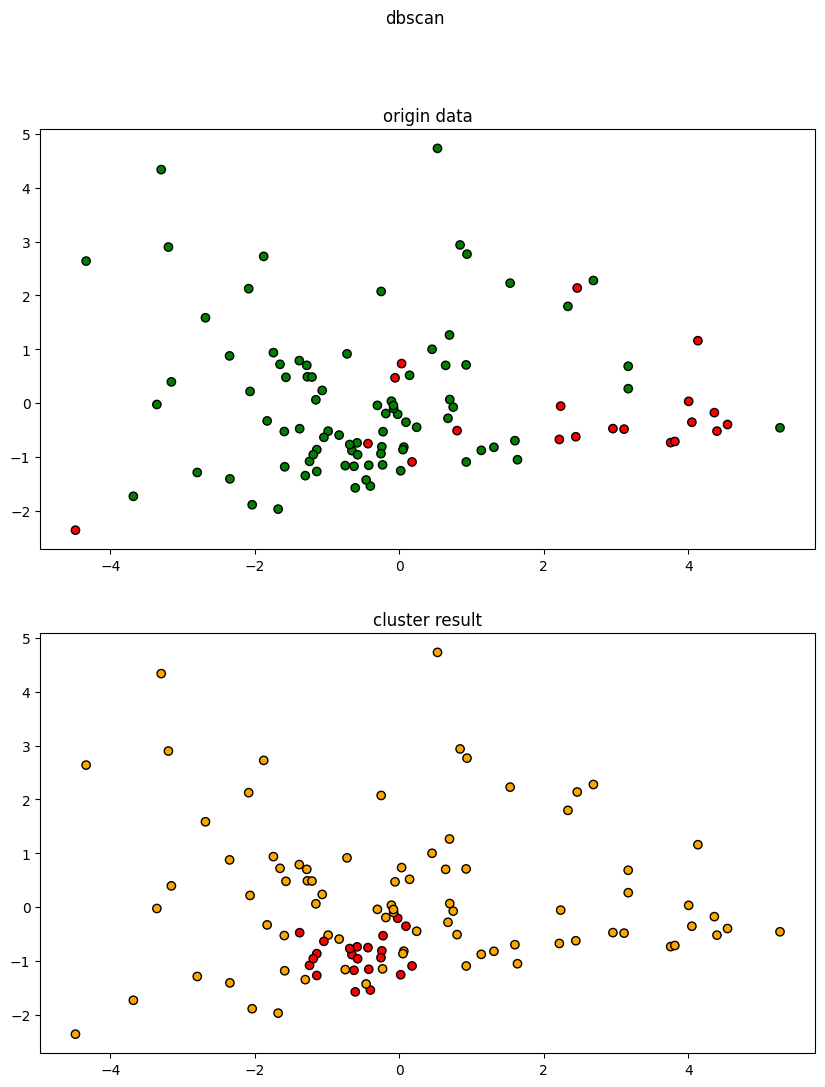

In [61]:
visualize(X, y, y_pred, title='dbscan', type='pca')

## 4.3. 本次实验的任务

1. 在鸢尾花数据集上，使用层次聚类算法，熟悉上述聚类流程。
```python
    # 层次聚类用到的包
    from sklearn.cluster import AgglomerativeClustering
```

2. 查阅K-means、DBScan、层次聚类的文档，调整方法的参数（至少两组）。比较不同参数下，三种聚类算法的结果（轮廓系数）。

    

3. 在阑尾炎数据集上，测试上述三种聚类方法。
```python
    # 阑尾炎数据集的路径
    root_path = '../dataset/appendicitis'
    data_path = 'appendicitis.csv'
```